In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mlt 
import matplotlib.pyplot as plt
import seaborn as sb 

In [5]:
train_df = pd.read_csv('../../../data/main_data/final.csv')
train_df = train_df.sort_values(by=['formal_date','index'])
train_df.head()
print('-------------------------------------------\n', f'training dataset shape : {train_df.shape}')
print('-------------------------------------------\n', 'data distrbution:\n', train_df.nunique())
print('-------------------------------------------\n', 'INFO:', train_df.info())

,index,formal_date,quarter,date,day_of_week,month,Suspected_Local,Suspected_Foreign,temp,humidity,sun_hours,province,neir_infected_cases,locked_percn,TotalInfected
0,1,2020-03-31,1,31,1,3,41,1,28.5,81.0,7.15,1,34,1.0,11
19,2,2020-03-31,1,31,1,3,1,0,28.5,76.0,8.50,1,32,1.0,15
15,3,2020-03-31,1,31,1,3,5,0,29.0,76.0,8.50,1,11,1.0,18
16,4,2020-03-31,1,31,1,3,2,0,28.5,75.0,8.00,2,19,1.0,0
17,5,2020-03-31,1,31,1,3,7,0,28.5,76.0,8.30,2,1,1.0,1


-------------------------------------------
 training dataset shape : (5250, 15)
-------------------------------------------
 data distrbution:
 index                   25
formal_date            210
quarter                  4
date                    31
day_of_week              7
month                    8
Suspected_Local         70
Suspected_Foreign        4
temp                    21
humidity                24
sun_hours              105
province                 9
neir_infected_cases    131
locked_percn            18
TotalInfected           49
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5250 entries, 0 to 5249
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                5250 non-null   int64  
 1   formal_date          5250 non-null   object 
 2   quarter              5250 non-null   int64  
 3   date                 5250 non-null   int64  
 4   day_of_week          5250

In [6]:
train_df.columns

Index(['index', 'formal_date', 'quarter', 'date', 'day_of_week', 'month',
       'Suspected_Local', 'Suspected_Foreign', 'temp', 'humidity', 'sun_hours',
       'province', 'neir_infected_cases', 'locked_percn', 'TotalInfected'],
      dtype='object')

In [7]:
mults = train_df.loc[:, ['index','Suspected_Local', 'Suspected_Foreign', 'temp', 'humidity', 'sun_hours',
'province', 'neir_infected_cases', 'locked_percn', 'TotalInfected']]

Visualize trands in data

<AxesSubplot:title={'center':'Visualizing COVID-19 data vector'}>

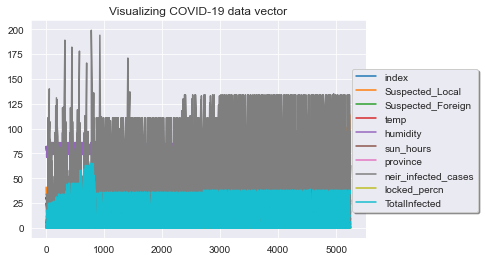

In [10]:
sb.set_style('darkgrid')
mults.plot(kind='line', legend='reverse', title='Visualizing COVID-19 data vector')
plt.legend(loc = 'upper right', shadow = True, bbox_to_anchor= (1.35, 0.8))
plt.show()

In [13]:
train_df.iloc[-1, :]

index                          25
formal_date            2020-10-31
quarter                         4
date                           31
day_of_week                     5
month                          10
Suspected_Local                 0
Suspected_Foreign               0
temp                           28
humidity                      0.5
sun_hours                    3.35
province                        9
neir_infected_cases             1
locked_percn                    0
TotalInfected                   0
Name: 5249, dtype: object

In [20]:
dates = [31, 30, 29, 28, 27, 26, 25, 24, 23, 22]
month = 10
test_df = train_df.loc[train_df.month == 10, :]
test_df = test_df.loc[train_df.date.isin(dates), :]
test_recs = test_df.shape[0]
train_df = train_df.iloc[:(train_df.shape[0]-test_recs), :]

In [21]:
print(f"train dataset num of rows: {train_df.shape[0]}")
print(f"test dataset num of rows: {test_recs}")

train dataset num of rows: 5000
test dataset num of rows: 250


In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
def adf_test(ds):
    dftest = adfuller(ds, autolag='AIC')
    adf = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','# Lags','# Observations'])

    for key, value in dftest[4].items():
       adf['Critical Value (%s)'%key] = value
    print (adf)

    p = adf['p-value']
    if p <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")

In [24]:
split_point = 250
ds_train = mults.iloc[:-split_point, :]
ds_test = mults.iloc[-split_point, :]

In [25]:
for i in ds_train.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_train[i])
    print('\n')

Column:  index
--------------------------------------
Test Statistic         -6.034806e+14
p-value                 0.000000e+00
# Lags                  2.900000e+01
# Observations          4.970000e+03
Critical Value (1%)    -3.431666e+00
Critical Value (5%)    -2.862122e+00
Critical Value (10%)   -2.567080e+00
dtype: float64

Series is Stationary


Column:  Suspected_Local
--------------------------------------
Test Statistic            -2.315858
p-value                    0.166904
# Lags                    26.000000
# Observations          4973.000000
Critical Value (1%)       -3.431666
Critical Value (5%)       -2.862121
Critical Value (10%)      -2.567079
dtype: float64

Series is Non-Stationary


Column:  Suspected_Foreign
--------------------------------------
Test Statistic         -1.188313e+01
p-value                 6.110942e-22
# Lags                  2.400000e+01
# Observations          4.975000e+03
Critical Value (1%)    -3.431665e+00
Critical Value (5%)    -2.862121e+00
C

In [26]:
# Differencing all variables to get rid of Stationarity
ds_differenced = ds_train.diff().dropna()

In [27]:
# Running the ADF test once again to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')

Column:  index
--------------------------------------
Test Statistic         -6.681194e+14
p-value                 0.000000e+00
# Lags                  2.300000e+01
# Observations          4.975000e+03
Critical Value (1%)    -3.431665e+00
Critical Value (5%)    -2.862121e+00
Critical Value (10%)   -2.567079e+00
dtype: float64

Series is Stationary


Column:  Suspected_Local
--------------------------------------
Test Statistic           -43.327125
p-value                    0.000000
# Lags                    25.000000
# Observations          4973.000000
Critical Value (1%)       -3.431666
Critical Value (5%)       -2.862121
Critical Value (10%)      -2.567079
dtype: float64

Series is Stationary


Column:  Suspected_Foreign
--------------------------------------
Test Statistic           -21.371998
p-value                    0.000000
# Lags                    32.000000
# Observations          4966.000000
Critical Value (1%)       -3.431667
Critical Value (5%)       -2.862122
Critical Va

In [28]:
ds_differenced = ds_differenced.diff().dropna()

# Running the ADF test for the 3rd time to test for Stationarity
for i in ds_differenced.columns:
    print("Column: ",i)
    print('--------------------------------------')
    adf_test(ds_differenced[i])
    print('\n')

Column:  index
--------------------------------------
Test Statistic         -2.845587e+14
p-value                 0.000000e+00
# Lags                  3.000000e+01
# Observations          4.967000e+03
Critical Value (1%)    -3.431667e+00
Critical Value (5%)    -2.862122e+00
Critical Value (10%)   -2.567080e+00
dtype: float64

Series is Stationary


Column:  Suspected_Local
--------------------------------------
Test Statistic           -39.064917
p-value                    0.000000
# Lags                    32.000000
# Observations          4965.000000
Critical Value (1%)       -3.431668
Critical Value (5%)       -2.862122
Critical Value (10%)      -2.567080
dtype: float64

Series is Stationary


Column:  Suspected_Foreign
--------------------------------------
Test Statistic           -28.634330
p-value                    0.000000
# Lags                    32.000000
# Observations          4965.000000
Critical Value (1%)       -3.431668
Critical Value (5%)       -2.862122
Critical Va

VAR model fitting and forecasting

In [29]:
from statsmodels.tsa.api import VAR

In [30]:
model = VAR(ds_differenced)
results = model.fit(maxlags=15, ic= 'aic')
results.summary()

             0.142680              NAN              NAN             NAN
L9.neir_infected_cases          0.000086         0.000188            0.457           0.647
L9.locked_percn                -0.799003         0.044175          -18.087           0.000
L9.TotalInfected               -0.008415         0.001782           -4.722           0.000
L10.index                       0.159811              NAN              NAN             NAN
L10.Suspected_Local            -0.003277         0.000999           -3.281           0.001
L10.Suspected_Foreign          -0.022261         0.051688           -0.431           0.667
L10.temp                        0.017573         0.008287            2.121           0.034
L10.humidity                   -0.000383         0.000290           -1.322           0.186
L10.sun_hours                  -0.011064         0.005062           -2.186           0.029
L10.province                   -0.572132              NAN              NAN             NAN
L10.neir_infected_

In [32]:
# Forecasting for 100 steps ahead
lag_order = results.k_ar
predicted = results.forecast(ds_differenced.values[-lag_order:], split_point)
forecast = pd.DataFrame(predicted, index = mults.index[-split_point:], columns = mults.columns)

In [33]:
forecast.head()

,index,Suspected_Local,Suspected_Foreign,temp,humidity,sun_hours,province,neir_infected_cases,locked_percn,TotalInfected
5010,-2.500000e+01,28.032842,0.004827,-2.338733,17.114659,1.178740,-8.000000e+00,-11.381548,0.012207,34.122036
5017,2.500000e+01,-48.682166,-0.009805,2.485363,-24.851328,0.099128,8.000000e+00,32.936870,0.171029,-33.979579
5020,1.691430e-13,19.543826,0.002284,-1.001993,0.200955,0.095064,9.037215e-14,-39.098836,-0.366972,-0.890940
5000,6.248580e-14,-1.494865,0.001285,0.007388,2.780034,-1.458494,1.000000e+00,9.863008,0.217161,-21.855153
5007,1.674768e-13,-0.388594,-0.000711,1.212055,4.729242,0.840102,-1.000000e+00,-0.674065,-0.100180,23.727474


In [34]:
# Inverting the Differencing Transformation
def invert_transformation(ds, df_forecast, second_diff=False):
    for col in ds.columns:
        # Undo the 2nd Differencing
        if second_diff:
            df_forecast[str(col)] = (ds[col].iloc[-1] - ds[col].iloc[-2]) + df_forecast[str(col)].cumsum()

        # Undo the 1st Differencing
        df_forecast[str(col)] = ds[col].iloc[-1] + df_forecast[str(col)].cumsum()

    return df_forecast

In [35]:
forecast_values = invert_transformation(ds_train, forecast, second_diff=True)


In [38]:
forecast_values.head()

,index,Suspected_Local,Suspected_Foreign,temp,humidity,sun_hours,province,neir_infected_cases,locked_percn,TotalInfected
5010,1.0,28.032842,0.004827,26.161267,17.614659,3.878740,1.0,12.618452,0.012207,34.122036
5017,2.0,7.383519,-0.000151,26.807897,9.877989,4.506608,1.0,37.173773,0.195443,34.264494
5020,3.0,6.278022,-0.002845,26.452534,2.342275,5.229539,1.0,22.630258,0.011707,33.516011
5000,4.0,3.677660,-0.004253,26.104559,-2.413406,4.493977,2.0,17.949751,0.045132,10.912375
5007,5.0,0.688704,-0.006374,26.968640,-2.439845,4.598517,2.0,12.595180,-0.021622,12.036214


Visualization

<AxesSubplot:>

Text(0.5, 1.0, 'VAR model evaluation on test set')

Text(0, 0.5, 'Total Infection people')

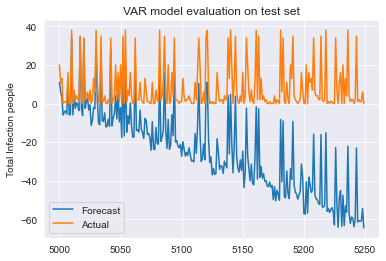

In [46]:
# Actual vs Forecasted Plots


plt.subplot()
sns_model_eval = sb.lineplot(data=forecast_values.TotalInfected, label='Forecast')
sns_model_eval = sb.lineplot(data=test_df.TotalInfected, label='Actual')
sns_model_eval.legend()
sns_model_eval.set_title("VAR model evaluation on test set")
sns_model_eval.set_ylabel("Total Infection people")
plt.savefig('actual_forecast.png')
plt.show()

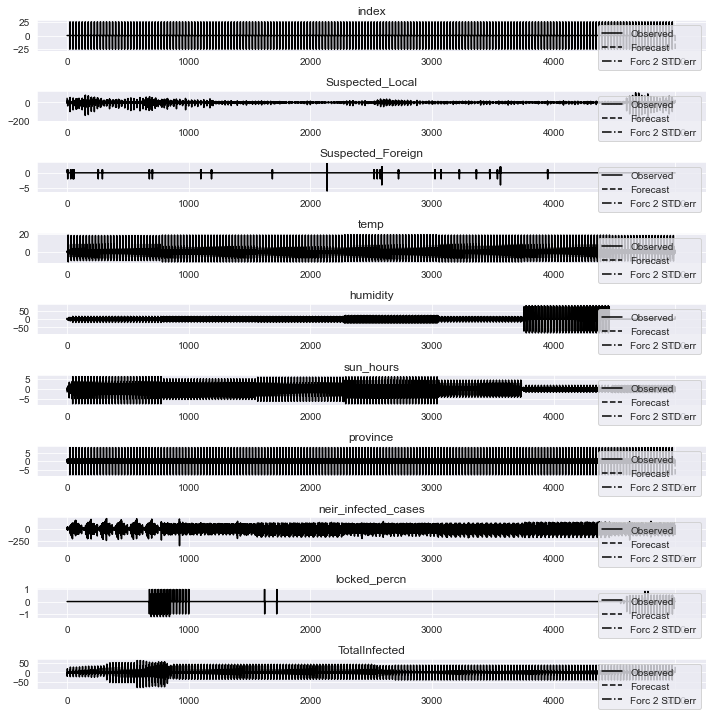

In [41]:
p1 = results.plot_forecast(1)
p1.tight_layout()